In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv")
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [43]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [44]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [45]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [47]:
data["Activity"] = le.fit_transform(data["Activity"])
data["Activity"].sample(5)

1151    5
6671    1
5258    5
8817    3
1974    0
Name: Activity, dtype: int32

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3,random_state=42)

In [49]:
feature_cols = data.columns[:-1]
feature_cols

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [50]:
train_idx, test_idx = next(sss.split(data[feature_cols], data.Activity))

In [51]:
x_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, "Activity"]

In [52]:
x_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, "Activity"]

In [53]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [54]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [56]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train)

In [57]:
y_pred = list()
y_prob = list(

)
coeff_labels = ['lr', 'lr_l1', 'lr_l2']
coeff_models = [lr, lr_l1, lr_l2]

for label,model in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(model.predict(x_test), name=label))
    y_prob.append(pd.Series(model.predict_proba(x_test).max(axis=1), name=label))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,lr_l1,lr_l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [69]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics  = list()
cm  = dict()

for label in coeff_labels:
    precision, recall, fscore, _ = score(y_test, y_pred[label], average='weighted')
    accuracy = accuracy_score(y_test, y_pred[label])
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]), label_binarize(y_pred[label], classes=[0,1,2,3,4,5]), average='weighted')
    cm[label] = confusion_matrix(y_test, y_pred[label])
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc},name = label))

metrics = pd.concat(metrics, axis=1)

In [71]:
metrics

,lr,lr_l1,lr_l2
precision,0.984144,0.983835,0.984477
recall,0.984142,0.983819,0.984466
fscore,0.984143,0.983815,0.984464
accuracy,0.984142,0.983819,0.984466
auc,0.990384,0.990144,0.990553


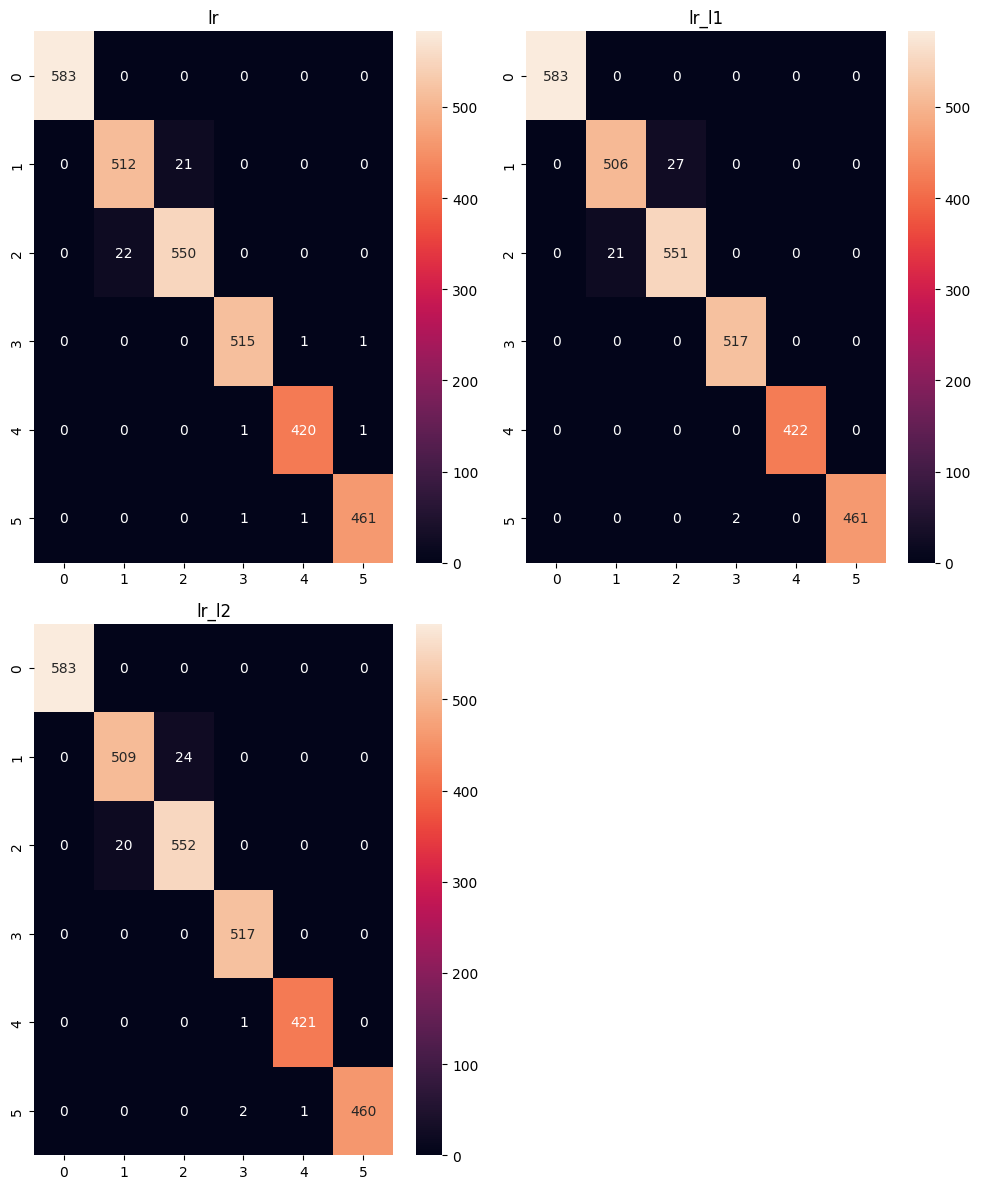

In [74]:
fig, axList = plt.subplots(nrows = 2, ncols = 2)
axList = axList.flatten()
fig.set_size_inches(10,12)

axList[-1].axis('off')

for axis, label in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[label], ax=axis, annot = True, fmt = 'd')
    axis.set(title = label)

plt.tight_layout()